In [1]:
%matplotlib inline

The purpose of this notebook is to plot passes of the England womens team using Statbomb data.

In [2]:
#importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen

## Opening the dataset

I open the data, using SBopen, then we filter the dataframe so that only passes are left,

This includes removing throw-ins.

In [3]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(69301)
passes = df.loc[df['type_name'] == 'Pass'].loc[df['sub_type_name'] != 'Throw-in'].set_index('id')

In [11]:
df

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,dribble_overrun,block_deflection,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,block_save_block,foul_committed_advantage,foul_won_advantage,foul_committed_card_id,foul_committed_card_name
0,080231d5-1070-4484-b6f6-d73ec50c7fc0,1,1,00:00:00,0,0,1,0.00000,69301,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a29f6be5-aae4-431f-9741-ac6792f51007,2,1,00:00:00,0,0,1,0.00000,69301,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,52d31509-0385-4d88-9877-14afe3cb43a9,3,1,00:00:00,0,0,1,0.00000,69301,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e08133a4-d370-42b7-977b-251effa1ed40,4,1,00:00:00,0,0,1,0.00000,69301,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8d5673e4-0d1b-48a1-8945-38f7ea98c548,5,1,00:00:00.140000,0,0,2,0.16873,69301,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3284,9b556dd4-2a68-4165-9f4c-dba2c0baeb7d,3285,2,00:48:23.093000,93,23,188,0.00000,69301,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,Yellow Card
3285,8cdf5fa5-0c80-4369-b234-a1251a07104c,3286,2,00:48:23.093000,93,23,188,0.00000,69301,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3286,95dc3f18-7494-4b78-b7bd-c07845c55b72,3287,2,00:49:19.754000,94,19,189,2.82260,69301,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3287,598864cb-81fb-4d6f-a9b9-db7b084c06b8,3288,2,00:49:24.887000,94,24,189,0.00000,69301,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Making the pass map using iterative solution
Draw the pitch and iterate through the passes. We check if a pass was made by Lucy Bronze.
If so, we take the starting coordinates of a pass and plot a circle.
Then we subtract the coordinates beginning of the pass
from the end of passes in order to draw pass arrows.


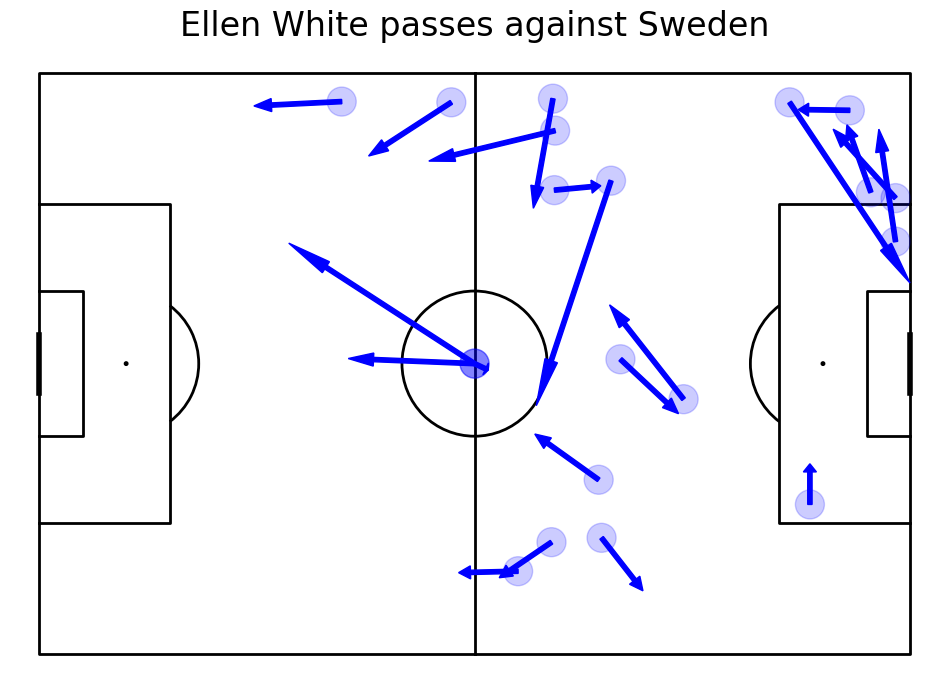

In [12]:
#drawing pitch
pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize=(10, 7))

for i,thepass in passes.iterrows():
    #if pass made by Ellen White
    if thepass['player_name']=='Ellen White':
        x=thepass['x']
        y=thepass['y']
        #plot circle
        passCircle=plt.Circle((x,y),2,color="blue")      
        passCircle.set_alpha(.2)   
        ax.add_patch(passCircle)
        dx=thepass['end_x']-x
        dy=thepass['end_y']-y
        #plot arrow
        passArrow=plt.Arrow(x,y,dx,dy,width=3,color="blue")
        ax.add_patch(passArrow)

ax.set_title("Ellen White passes against Sweden", fontsize = 24)     
fig.set_size_inches(10, 7)
plt.show()

## Making the pass map using mplsoccer functions
Again, we filter out passes made by Ellen White.
Then, we take only the columns needed to plot passes  - coordinates of start and end of a pass.
We draw a pitch and using arrows method we plot the passes.
Using scatter method we draw circles where the pass started
filter the dataset to completed passes for Ellen White.

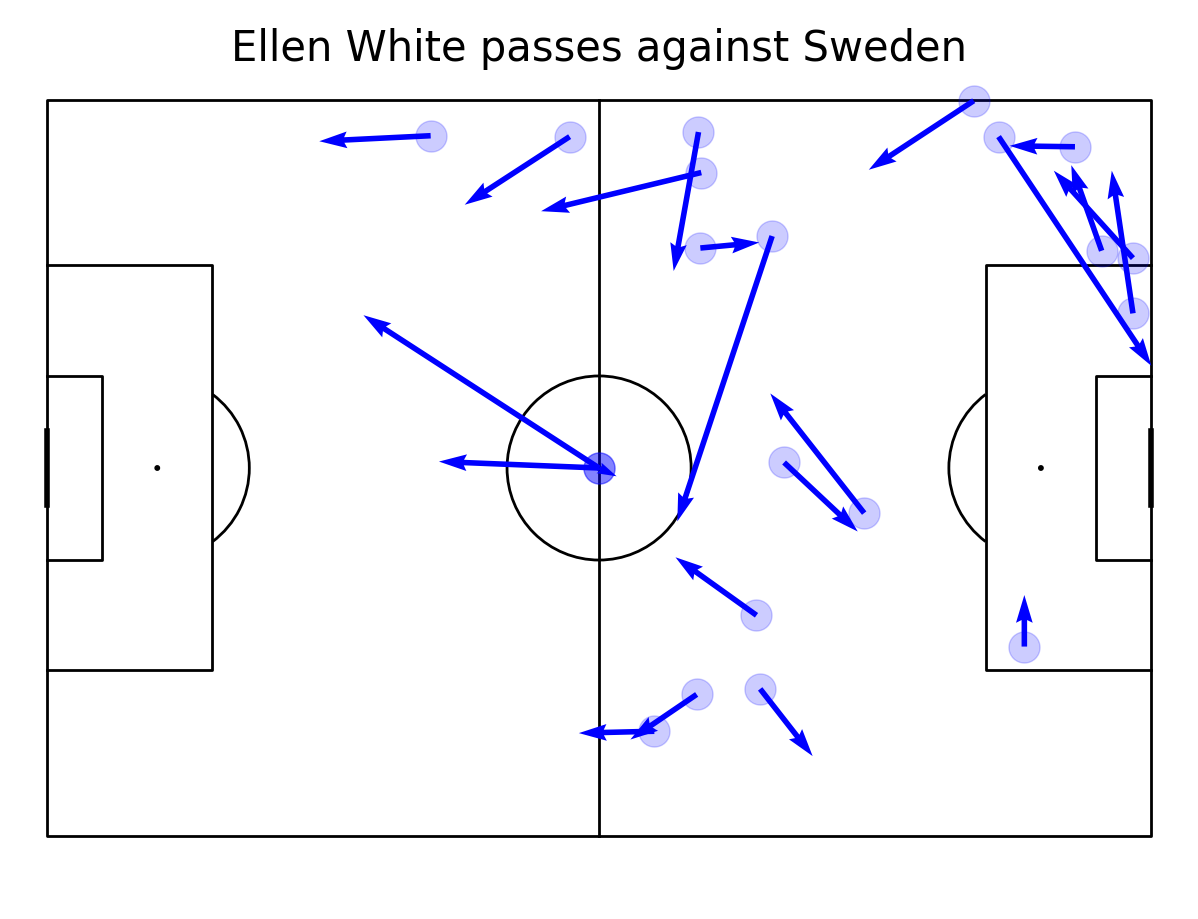

In [13]:
mask_bronze = (df.type_name == 'Pass') & (df.player_name == "Ellen White")
df_pass = df.loc[mask_bronze, ['x', 'y', 'end_x', 'end_y']]

pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.arrows(df_pass.x, df_pass.y,
            df_pass.end_x, df_pass.end_y, color = "blue", ax=ax['pitch'])
pitch.scatter(df_pass.x, df_pass.y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])
fig.suptitle("Ellen White passes against Sweden", fontsize = 30) 
plt.show()

## Plotting multiple pass maps on one figure
mplsoccer allows to draw multiple plots on one plot. Let's demonstrate how to do that by
plotting passes made by all of England's players.
To do so we first filter out players from England. We plot 16 pitches in 4 rows and columns. Then, for each
player, on a separate axis, their pass map is plotted. As the last step, we remove unnecessary pitches
(during 2019 World Cup only 3, not 5, changes were allowed) and set the title.


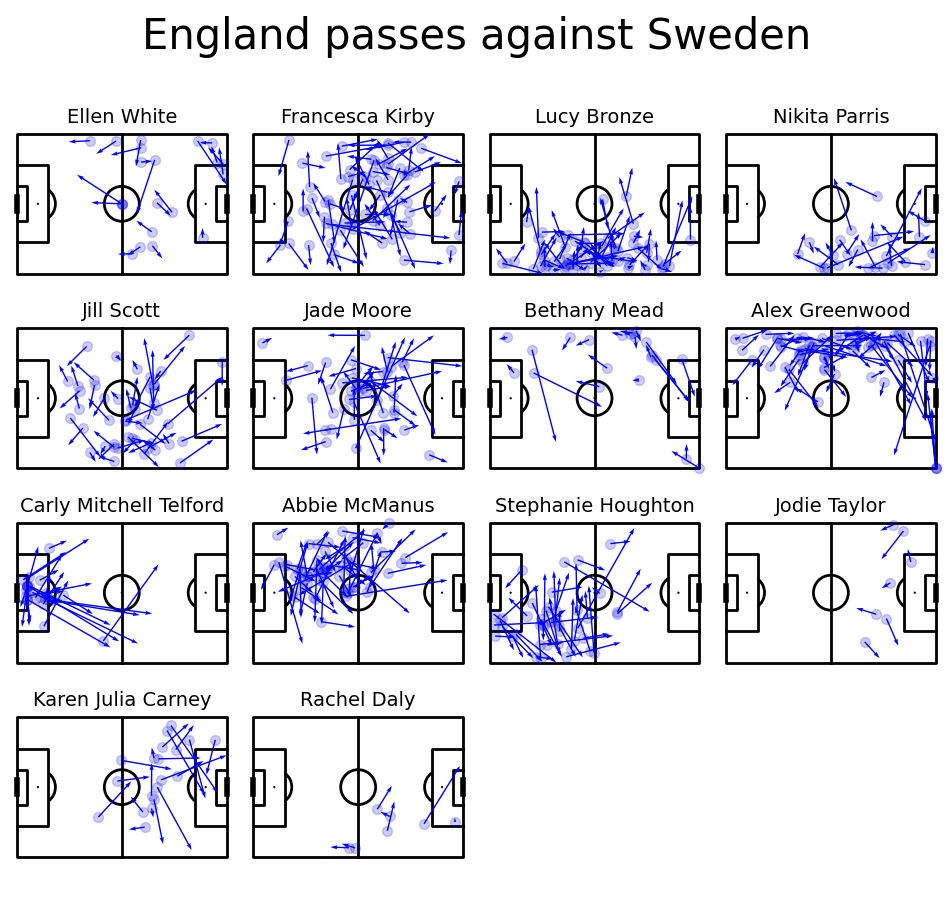

In [14]:
#prepare the dataframe of passes by England that were no-throw ins
mask_england = (df.type_name == 'Pass') & (df.team_name == "England Women's") & (df.sub_type_name != "Throw-in")
df_passes = df.loc[mask_england, ['x', 'y', 'end_x', 'end_y', 'player_name']]
#get the list of all players who made a pass
names = df_passes['player_name'].unique()

#draw 4x4 pitches
pitch = Pitch(line_color='black', pad_top=20)
fig, axs = pitch.grid(ncols = 4, nrows = 4, grid_height=0.85, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0.04, endnote_space=0.01)

#for each player
for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
    #put player name over the plot
    ax.text(60, -10, name,
            ha='center', va='center', fontsize=14)
    #take only passes by this player
    player_df = df_passes.loc[df_passes["player_name"] == name]
    #scatter
    pitch.scatter(player_df.x, player_df.y, alpha = 0.2, s = 50, color = "blue", ax=ax)
    #plot arrow
    pitch.arrows(player_df.x, player_df.y,
            player_df.end_x, player_df.end_y, color = "blue", ax=ax, width=1)
    
#We have more than enough pitches - remove them
for ax in axs['pitch'][-1, 16 - len(names):]:
    ax.remove()
    
#Another way to set title using mplsoccer 
axs['title'].text(0.5, 0.5, 'England passes against Sweden', ha='center', va='center', fontsize=30)
plt.show()